## 1. Error position

### 1.1_input SB&AF

In [3]:
import pandas as pd

# 读取数据
df = pd.read_csv("/homes/zihao/EBI_INTER/P1_Annot/output.txt", sep='\t')
# 分别计算 DP、AF、SB 的平均值
columns = ["AF", "SB"]
results = {}
for i, col in enumerate(columns):
    df_col = df.dropna(subset=[col])[["Position", col]]
    df_col[col] = df_col[col].astype(float)
    result = df_col.groupby(by=["Position"], as_index=False).max(numeric_only=True)
    result = result[result[col] != 0]  # 只保留非零值
    results[f"df_err_v{i+1}"] = result
    

# 返回结果
df_err_v1 = results["df_err_v1"]
df_err_v2 = results["df_err_v2"]

# 创建一个新的索引
new_index = pd.RangeIndex(start=1, stop=29903, step=1)

# 重新索引数据框
df_err_v1 = df_err_v1.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})
df_err_v2 = df_err_v2.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})


In [4]:
print(df_err_v1.head())
print("==================")
print(df_err_v2.head())

   Position   AF
0         1  0.0
1         2  0.0
2         3  0.0
3         4  0.0
4         5  0.0
   Position   SB
0         1  0.0
1         2  0.0
2         3  0.0
3         4  0.0
4         5  0.0


### 1.2_input coverage

In [6]:
df_err = pd.read_csv("/homes/zihao/EBI_INTER/P1_Coverage/processed_data.txt", sep='\t')[['Position','MEAN_err']]
# 使用loc和布尔索引筛选出满足条件的行，然后删除该列
df = df_err[df_err['Position'].astype(int) <= 29903]

df["MEAN_err"] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')
df_err = df.groupby(by=["Position"], as_index=False).mean(numeric_only=True)

# 重新索引数据框
df_err = df_err.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})

df_err.head()

,Position,MEAN_err
0,1,0.000000
1,2,0.000000
2,3,0.004951
3,4,0.010309
4,5,0.000376


## Tips 
SB>0, and/or a very low coverage (for example a coverage ratio<0.1), and/or an AF>0.01 .

In [7]:
# 将'MEAN_err'列转换为浮点数
df_err['MEAN_err'] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')

# 将NaN值替换为0
df_err['MEAN_err'] = df_err['MEAN_err'].fillna(0)

# 将'MEAN_err'列与0.1进行比较
df_err['Flag'] = df_err['MEAN_err'] > 0.1

df_err.head()

,Position,MEAN_err,Flag
0,1,0.000000,False
1,2,0.000000,False
2,3,0.004951,False
3,4,0.010309,False
4,5,0.000376,False


In [8]:
# 将'MEAN_err'列与0.1进行比较
df_err_v1['Flag'] = df_err_v1['AF'] > 0.01
df_err_v1.head()

# 将'MEAN_err'列与0.1进行比较
df_err_v2['Flag'] = df_err_v2['SB'] > 0
df_err_v2.head()

,Position,SB,Flag
0,1,0.0,False
1,2,0.0,False
2,3,0.0,False
3,4,0.0,False
4,5,0.0,False


In [18]:
df_err.to_csv("/homes/zihao/EBI_INTER/A_Datas/ERR_COV.txt", sep='\t', index=False)
df_err_v1.to_csv("/homes/zihao/EBI_INTER/A_Datas/ERR_AF.txt", sep='\t', index=False)
df_err_v2.to_csv("/homes/zihao/EBI_INTER/A_Datas/ERR_SB.txt", sep='\t', index=False)

## Visualization_try

In [24]:
df_err_v1_F = set(df_err_v1[df_err_v1['Flag'] == False]['Position'])

In [31]:
SET_SB = set(df_err_v2['Flag'])

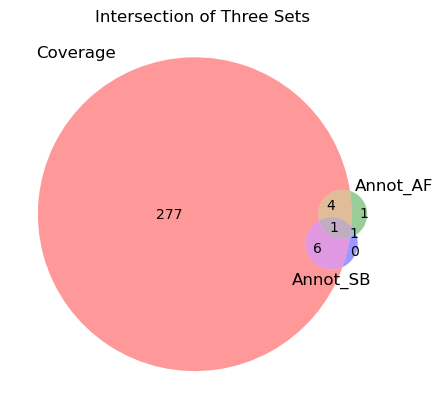

In [29]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 创建数据
set1 = set(df_err[df_err['Flag'] == True]['Position'])
set2 = set(df_err_v1[df_err_v1['Flag'] == True]['Position'])
set3 = set(df_err_v2[df_err_v2['Flag'] == True]['Position'])

# 创建Venn图
venn3([set1, set2, set3], ('Coverage', 'Annot_AF', 'Annot_SB'))

# 设置图形属性
plt.title('Intersection of Three Sets')
plt.show()


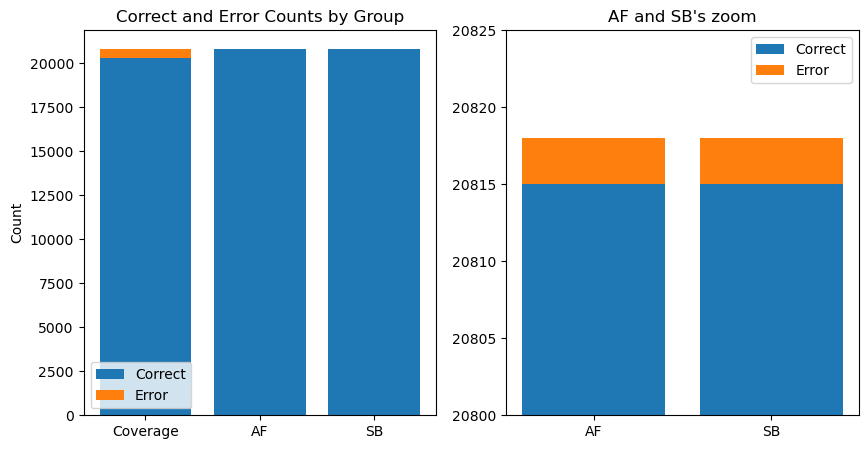

In [100]:
import matplotlib.pyplot as plt

# 创建数据
group_labels = ['Coverage', 'AF', 'SB']
error_counts = [df_err['Flag'].value_counts()[True], df_err_v1['Flag'].value_counts()[True], df_err_v2['Flag'].value_counts()[True]]
correct_counts = [df_err['Flag'].value_counts()[False], df_err_v1['Flag'].value_counts()[False], df_err_v2['Flag'].value_counts()[False]]

# 创建堆积条形图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 第一个子图
ax1.bar(group_labels, correct_counts, label='Correct')
ax1.bar(group_labels, error_counts, bottom=correct_counts, label='Error')
ax1.set_ylabel('Count')
ax1.set_title('Correct and Error Counts by Group')
ax1.legend()

# 第二个子图
ax2.bar(group_labels[1:], correct_counts[1:], label='Correct')
ax2.bar(group_labels[1:], error_counts[1:], bottom=correct_counts[1:], label='Error')
ax2.set_title('AF and SB\'s zoom')
ax2.set_ylim(20800, 20825)  # 只有第二个子图设置y轴范围
ax2.legend()

# 显示图形
plt.show()



## 2. All position

In [3]:
import pandas as pd

In [4]:
df_all_1 = pd.read_csv('/homes/zihao/EBI_INTER/P1_Annot/AF_RATIO.txt', sep='\t').reset_index().rename(columns={'index': 'POS'})
df_all_2 = pd.read_csv('/homes/zihao/EBI_INTER/P1_Annot/SB_RATIO.txt', sep='\t').reset_index().rename(columns={'index': 'POS'})

In [11]:
df_all_1['Flag'] = df_all_1['ERROR_all'] > 0.01
df_all_2['Flag'] = df_all_2['ERROR_all'] > 0
df_all_1.to_csv("/homes/zihao/EBI_INTER/A_Datas/ALL_AF.txt", sep='\t', index=False)
df_all_2.to_csv("/homes/zihao/EBI_INTER/A_Datas/ALL_SB.txt", sep='\t', index=False)

In [12]:
df_all = pd.read_csv('/homes/zihao/EBI_INTER/P1_Coverage/processed_data_all.txt', sep='\t').reset_index().rename(columns={'index': 'POS'})
df_all['Flag'] = df_all['MEAN_pos'] > 0.1
df_all.to_csv("/homes/zihao/EBI_INTER/A_Datas/ALL_COV.txt", sep='\t', index=False)